In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import joblib
import pickle

In [2]:
test_set = pd.read_csv("../Datasets/test.csv")
train_set = pd.read_csv("../Datasets/train.csv")

In [3]:
test_set.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [4]:
train_set.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


### Data:

Date of joining: YYYY-MM-DD

Gender: Female / Male

Company Type: Service / Product

WFH Setup Available: Yes / No

Designation: Number

Resource Allocation: Number

Mental Fatigue: Number

Burn Rate: Number


------------------------

### Get Dummies

In [5]:
test_gender = pd.get_dummies(test_set['Gender'])
test_company_type = pd.get_dummies(test_set['Company Type'])
test_wfh = pd.get_dummies(test_set['WFH Setup Available'])

test_set_vtwo = pd.concat([test_set, test_gender], axis=1)
test_set_vtwo = pd.concat([test_set_vtwo, test_company_type], axis=1)
test_set_vtwo = pd.concat([test_set_vtwo, test_wfh], axis=1)

In [6]:
test_set_vtwo.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Female,Male,Product,Service,No,Yes
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7,1,0,0,1,1,0
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,1,0,1,0,0,1
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,0,1,1,0,0,1
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6,1,0,0,1,1,0
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4,1,0,1,0,1,0


In [7]:
train_gender = pd.get_dummies(train_set['Gender'])
train_company_type = pd.get_dummies(train_set['Company Type'])
train_wfh = pd.get_dummies(train_set['WFH Setup Available'])

train_set_vtwo = pd.concat([train_set, train_gender], axis=1)
train_set_vtwo = pd.concat([train_set_vtwo, train_company_type], axis=1)
train_set_vtwo = pd.concat([train_set_vtwo, train_wfh], axis=1)

In [8]:
train_set_vtwo.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,1,0,1,0,0,1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,0,1,1,0


----------------------------

### Data exploration

In [9]:
train_set.isnull().any()

Employee ID             False
Date of Joining         False
Gender                  False
Company Type            False
WFH Setup Available     False
Designation             False
Resource Allocation      True
Mental Fatigue Score     True
Burn Rate                True
dtype: bool

<AxesSubplot:>

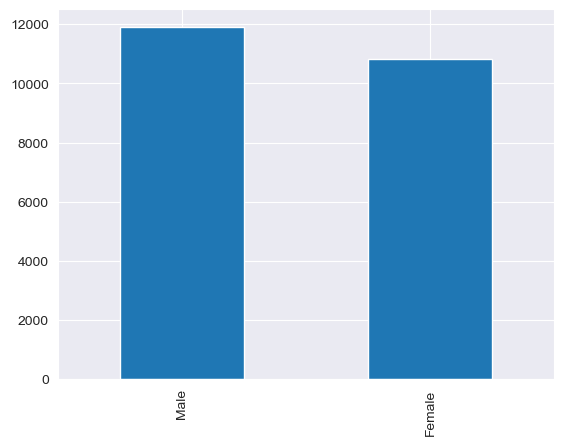

In [10]:
# Gender Visualization
gender_freq = train_set['Gender'].value_counts()
gender_freq.index = ['Male', 'Female']
gender_freq.plot(kind='bar')

<AxesSubplot:>

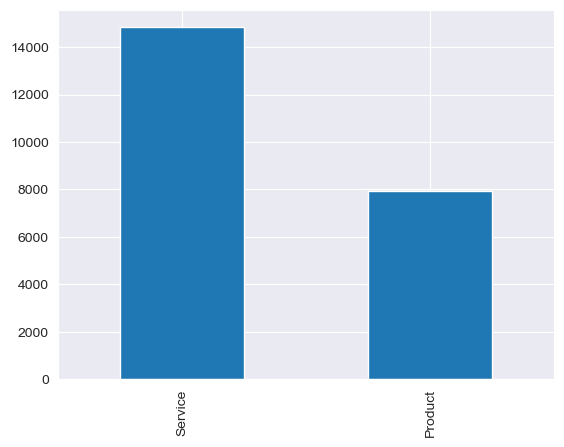

In [11]:
# Company type Visualization
company_type_freq = train_set['Company Type'].value_counts()
company_type_freq.index = ['Service', 'Product']
company_type_freq.plot(kind='bar')

<AxesSubplot:>

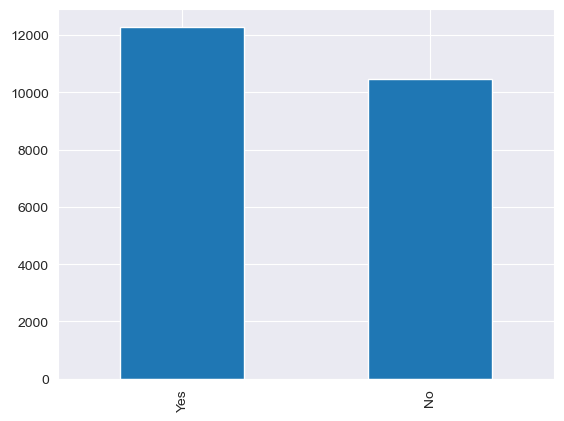

In [12]:
# WFH Setup Available Visualization
wfh_freq = train_set['WFH Setup Available'].value_counts()
wfh_freq.index = ['Yes', 'No']
wfh_freq.plot(kind='bar')

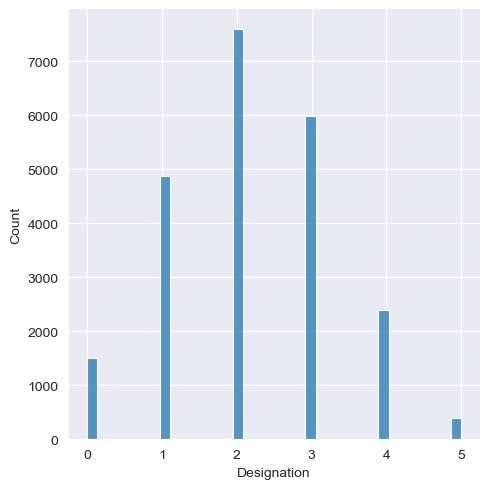

In [13]:
# Designation Visualization
sns.displot(train_set, x='Designation', height=5)

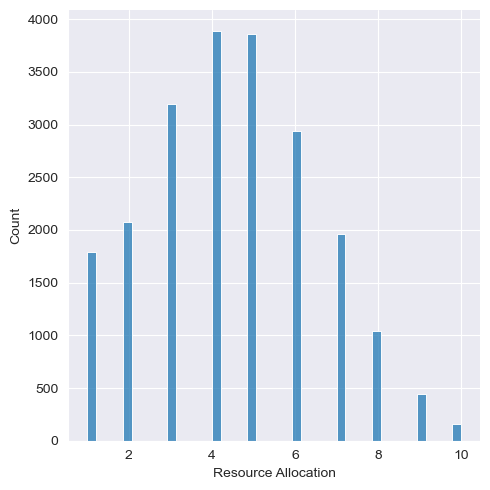

In [14]:
# Resource Allocation Visualization
sns.displot(train_set, x='Resource Allocation', height=5)

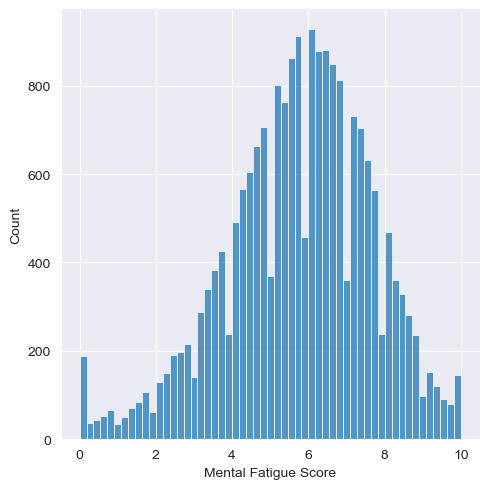

In [15]:
# Mental Fatigue Score Visualization
sns.displot(train_set, x='Mental Fatigue Score', height=5)

---------------

### Delete unusable data

In [16]:
train_set_vtwo.drop(['Employee ID'], axis=1, inplace=True)

In [17]:
train_set_vtwo.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,1,0,1,0,0,1
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,0,1,1,0


In [18]:
test_set_vtwo.drop(['Employee ID'], axis=1, inplace=True)

In [19]:
test_set_vtwo.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Female,Male,Product,Service,No,Yes
0,2008-12-10,Female,Service,No,2.0,5.0,7.7,1,0,0,1,1,0
1,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,1,0,1,0,0,1
2,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,0,1,1,0,0,1
3,2008-02-07,Female,Service,No,3.0,6.0,4.6,1,0,0,1,1,0
4,2008-07-17,Female,Product,No,2.0,5.0,6.4,1,0,1,0,1,0


-------------

### Heatmap

<AxesSubplot:>

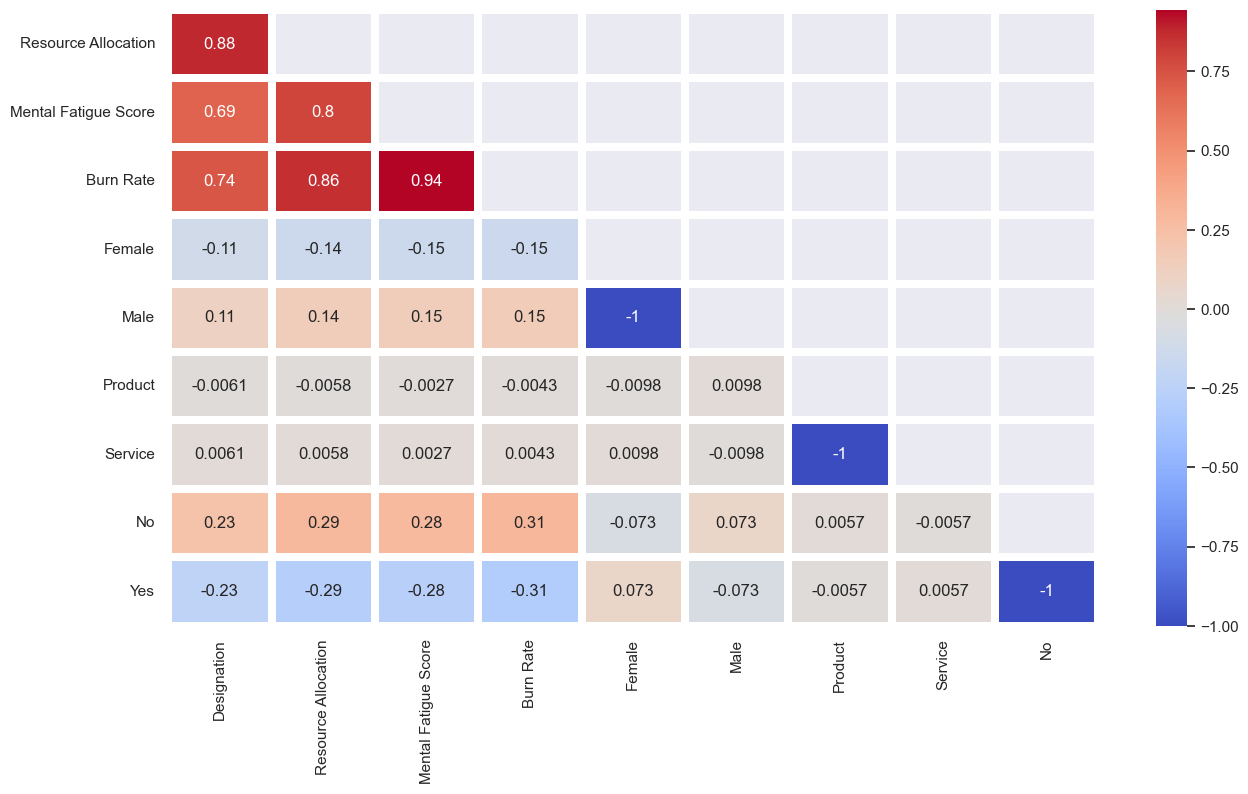

In [20]:
train_corr = train_set_vtwo.corr()

# mask
mask = np.triu(np.ones_like(train_corr, dtype=bool))
# Adjust mask and train_set
mask = mask[1:, :-1]
corr = train_corr.iloc[1:, :-1].copy()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, linewidths=5.5, cmap="coolwarm")

### Relations

Burn rate heeft een relatie met paar andere tabellen.

Hoge Relatie:
- Designation
- Resource Allocation
- Mental Fatigue Score

Gemiddelde Relatie:
- Yes (WFH)
- No (WFH)

Lage Relatie:
- Female (Gender)
- Male (Gender)

-----------------------

### Predictions

In [21]:
train_set_vtwo

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Female,Male,Product,Service,No,Yes
0,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,0,1,1,0
1,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1,0,1
2,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49,1,0,1,0,0,1
3,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1,0,1
4,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41,1,0,0,1,1,0
22746,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59,1,0,1,0,0,1
22747,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72,0,1,0,1,0,1
22748,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52,1,0,0,1,1,0


In [22]:
train_set_vtwo = train_set_vtwo.dropna(axis=0)

In [23]:
X = train_set_vtwo[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Female', 'Male', 'Product', 'Service', 'No', 'Yes']]
y = train_set_vtwo['Burn Rate']

#x_test = test_set_vtwo[['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Female', 'Male', 'Product', 'Service', 'No', 'Yes']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 1)


In [24]:
linear_regression = LinearRegression()

In [25]:
linear_regression.fit(X_train.values,y_train)

LinearRegression()

In [26]:
y_train_pred = linear_regression.predict(X_train.values)

In [27]:
y_test_pred = linear_regression.predict(X_test)

D:\Anaconda\envs\HCAD\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [28]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 0.05
Mean squared error = 0.0
Median absolute error = 0.04
Explain variance score = 0.92
R2 score = 0.92


In [29]:
filename = "Completed_model.pkl"
joblib.dump(linear_regression, filename)

['Completed_model.pkl']

In [30]:
##loaded_model = joblib.load(filename)
##result = loaded_model.score(X_test, y_test)
##print(result)